# **SHAP values**

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

TEST_PATH = DATA_DIR + '/Dataset_test_CF.csv'

# Neccesary info for loading models
import sys
sys.path.insert(0,'../Training')  # add previous directory to path to load constants module
import constants as const
from keras import backend as K
Cp_max = 0.5926
V_mean = 6.314169410268349
V_std = 1.9826865496833004
MODEL_PATH = MODELS_DIR + 'Pphys_Cp3D.h5'

SAMPLES = 1_000
#SAMPLES = 10_000
#SAMPLES = 100_000

Load datasets and model, then fit explainer and return SHAP values:

In [ ]:
def show_shap_values(test_path, model_path, reduced_size=None):
    
    model = load_model(model_path)

    test_dataset = pd.read_csv(TEST_PATH)
    x_phys = test_dataset[['V', 'theta', 'W']]
    X_test = x_phys
    X_test.reset_index(drop=True, inplace=True)

    if reduced_size:
        test_data = X_test.sample(n=reduced_size, replace=False).to_numpy()
    else:
        test_data = X_test.to_numpy()

    """ # Remove outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
    Q1 = np.percentile(test_data, 25, axis=0)
    Q3 = np.percentile(test_data, 75, axis=0)
    IQR = Q3 - Q1
    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a mask for rows where all feature values are within the IQR bounds
    mask = ((test_data >= lower_bound) & (test_data <= upper_bound)).all(axis=1)
    # Filter out rows that contain outliers
    test_data_no_outliers = test_data[mask]
    print("Original data shape:", test_data.shape)
    print("Data shape after outlier removal:", test_data_no_outliers.shape) """

    explainer = shap.Explainer(model, test_data, feature_names=X_test.columns)
    shap_values = explainer(test_data)

    return shap_values

Index(['V', 'theta', 'W'], dtype='object')
3767/3767 [==============================] - 2s 440us/step


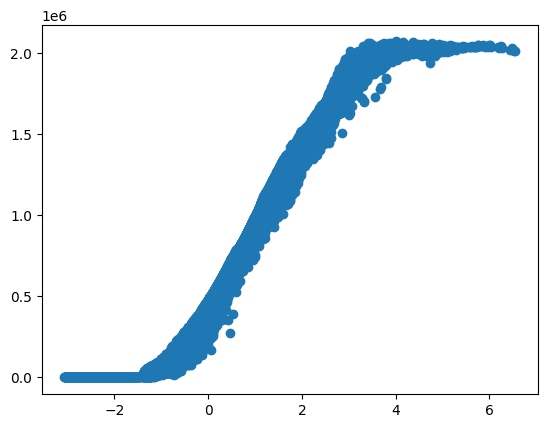

In [74]:
# Inspect data

test_dataset = pd.read_csv(TEST_PATH)
x_phys = test_dataset[['V', 'theta', 'W']]    
X_test = x_phys
X_test.columns.values[0:3] = ['V', 'theta', 'W']
X_test.reset_index(drop=True, inplace=True)
print(X_test.columns)

model = load_model(MODEL_PATH)
Pphys_data = model.predict(X_test)

V_data = X_test['V']
#V_data = X_test['V_phys']
plt.scatter(V_data,Pphys_data)

## Default model

Plots for the vanilla model and dataset.

In [76]:
shap_values = show_shap_values(TEST_PATH, MODEL_PATH, SAMPLES)

# Save shap values
import joblib  # for saving the SHAP values
joblib.dump(shap_values, 'shap_Pphys.sav')

Original data shape: (1000, 3)
Data shape after outlier removal: (817, 3)


['shap_Pphys.sav']

In [83]:
# Load shap values
shap_values_CF = joblib.load('shap_Pphys.sav')

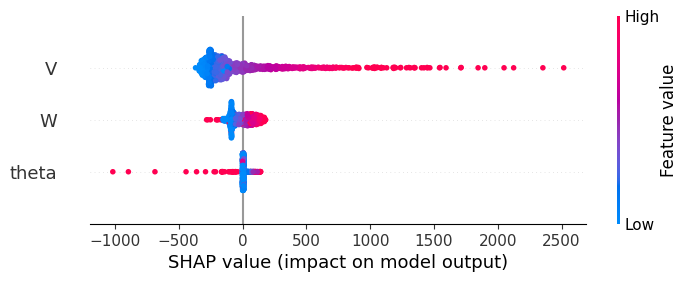

In [84]:
shap.plots.beeswarm(shap_values/1000, max_display=10)

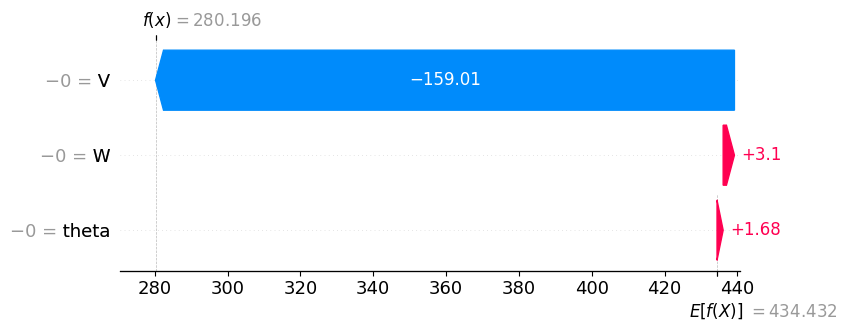

In [79]:
shap.plots.waterfall(shap_values[0]/1000, max_display=20)

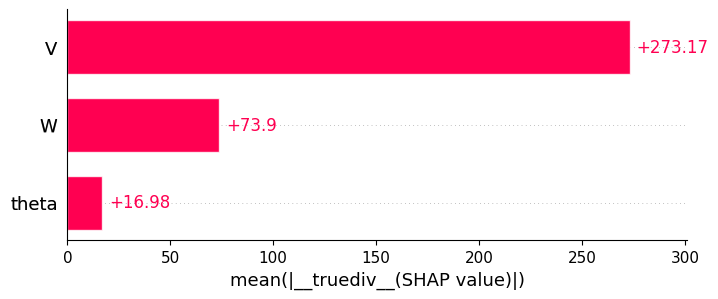

In [80]:
shap.plots.bar(shap_values/1000, max_display=20)

(1000, 3)
(1000, 1)
(1000, 3)
['V', 'theta', 'W']


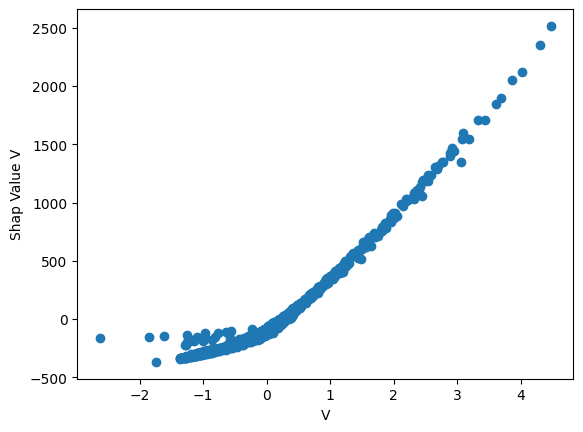

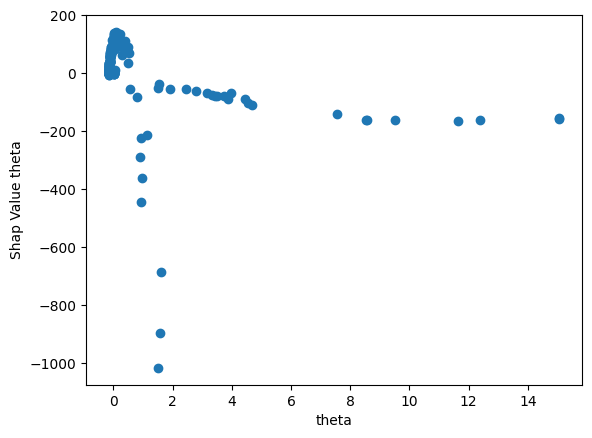

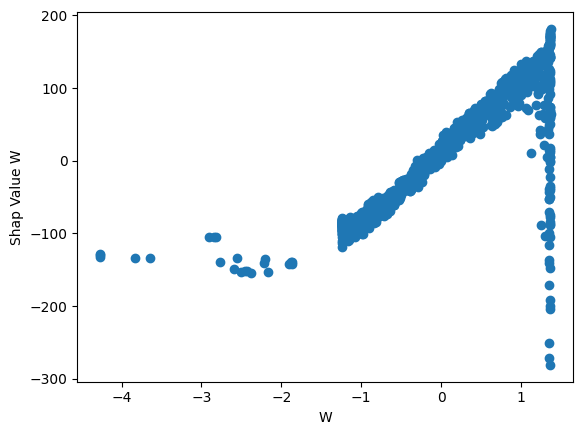

In [82]:
# Scatter plot of shap value vs variable

print(shap_values.values.shape)
print(shap_values.base_values.shape)
print(shap_values.data.shape)
print(shap_values.feature_names)

x_id = shap_values.feature_names.index("V")
y_id = shap_values.feature_names.index("V")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000)
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])
plt.show()

x_id = shap_values.feature_names.index("theta")
y_id = shap_values.feature_names.index("theta")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000)
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])
plt.show()

x_id = shap_values.feature_names.index("W")
y_id = shap_values.feature_names.index("W")
plt.scatter(shap_values.data[:,x_id],shap_values.values[:,y_id]/1000)
plt.xlabel(shap_values.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values.feature_names[y_id])
plt.show()